# Brazil data

Working with a Brazilian dataset composed of several economic indicators

In [202]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['figure.figsize'] = (14,4)

##### Getting the data using the Brazil's central bank API 

In [203]:
url = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.189/dados?formato=json'

In [204]:
df = pd.read_json(url)

In [205]:
df.head()

,data,valor
0,01/06/1989,19.68
1,01/07/1989,35.90
2,01/08/1989,36.92
3,01/09/1989,39.92
4,01/10/1989,40.64


Format the date

In [206]:
df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')

In [207]:
df.head()

,data,valor
0,1989-06-01,19.68
1,1989-07-01,35.90
2,1989-08-01,36.92
3,1989-09-01,39.92
4,1989-10-01,40.64


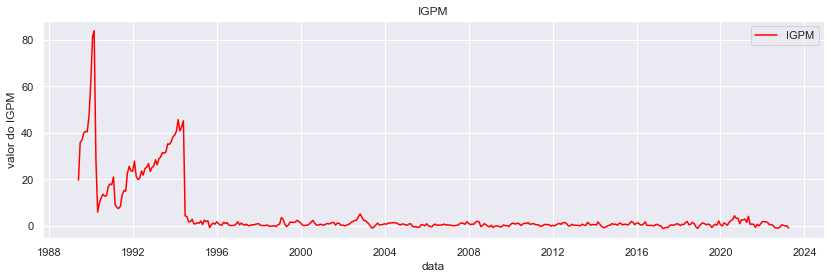

In [208]:
plt.plot(df['data'], df['valor'], color = 'red', label = 'IGPM')
plt.title('IGPM')
plt.xlabel('data')
plt.ylabel('valor do IGPM')
plt.legend()
plt.show()

In [209]:
df.valor.describe()

count    407.000000
mean       4.855455
std       11.506445
min       -1.100000
25%        0.265000
50%        0.740000
75%        1.735000
max       83.950000
Name: valor, dtype: float64

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    407 non-null    datetime64[ns]
 1   valor   407 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.5 KB


In [211]:
df = df.rename(columns={'valor': 'IGPM'})

In [212]:
df.head()

,data,IGPM
0,1989-06-01,19.68
1,1989-07-01,35.90
2,1989-08-01,36.92
3,1989-09-01,39.92
4,1989-10-01,40.64


In [213]:
# filter the data from the dataset above
import datetime
start_date = datetime.datetime(2013, 1, 1)
end_date = datetime.datetime(2023, 3, 1)
df = df[(df['data'] >= start_date) & (df['data'] <= end_date)]

In [214]:
df.head()

,data,IGPM
283,2013-01-01,0.34
284,2013-02-01,0.29
285,2013-03-01,0.21
286,2013-04-01,0.15
287,2013-05-01,0.00


In [215]:
# Finding missing values
df.isna().sum().sort_values(ascending=False)

data    0
IGPM    0
dtype: int64

In [216]:
df.info

<bound method DataFrame.info of           data  IGPM
283 2013-01-01  0.34
284 2013-02-01  0.29
285 2013-03-01  0.21
286 2013-04-01  0.15
287 2013-05-01  0.00
..         ...   ...
401 2022-11-01 -0.56
402 2022-12-01  0.45
403 2023-01-01  0.21
404 2023-02-01 -0.06
405 2023-03-01  0.05

[123 rows x 2 columns]>

A high standard deviation means high variability data. This is due to period of hyperinflation in Brazil, which ended in 1994.
This data will be filtered in order to match 'Spread', 'Default', and 'Credit cost'. 

#### Downloand the Spread data

In [217]:
url_1 = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.20783/dados?formato=json'

df_Spread = pd.read_json(url_1)

In [218]:
df_Spread.head()

,data,valor
0,01/03/2011,17.65
1,01/04/2011,18.22
2,01/05/2011,18.14
3,01/06/2011,17.95
4,01/07/2011,17.94


In [219]:
df_Spread['data'] = pd.to_datetime(df_Spread['data'], format='%d/%m/%Y')

In [220]:
df_Spread.head()

,data,valor
0,2011-03-01,17.65
1,2011-04-01,18.22
2,2011-05-01,18.14
3,2011-06-01,17.95
4,2011-07-01,17.94


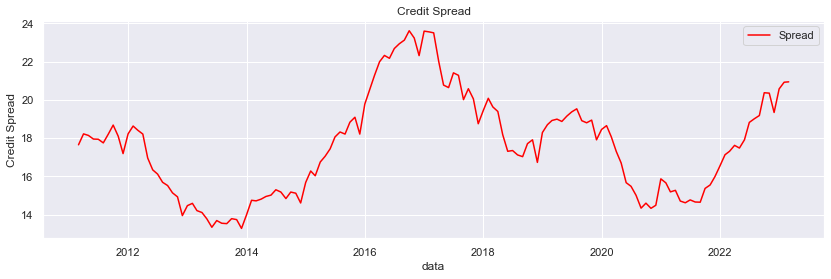

In [221]:
plt.plot(df_Spread['data'], df_Spread['valor'], color = 'red', label = 'Spread')
plt.title('Credit Spread')
plt.xlabel('data')
plt.ylabel('Credit Spread')
plt.legend()
plt.show()

In [222]:
df_Spread.describe()

,valor
count,145.000000
mean,17.639517
std,2.643494
min,13.280000
25%,15.190000
50%,17.750000
75%,19.150000
max,23.610000


In [223]:
df_Spread.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    145 non-null    datetime64[ns]
 1   valor   145 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.4 KB


In [224]:
df_Spread = df_Spread.rename(columns={'valor': 'Credit_Spread'})

In [225]:
df_Spread.head()

,data,Credit_Spread
0,2011-03-01,17.65
1,2011-04-01,18.22
2,2011-05-01,18.14
3,2011-06-01,17.95
4,2011-07-01,17.94


In [226]:
# filter the data from the dataset above
start_date = datetime.datetime(2013, 1, 1)
end_date = datetime.datetime(2023, 3, 1)
df_Spread = df_Spread[(df_Spread['data'] >= start_date) & (df_Spread['data'] <= end_date)]

In [227]:
df_Spread.head()

,data,Credit_Spread
22,2013-01-01,14.47
23,2013-02-01,14.59
24,2013-03-01,14.21
25,2013-04-01,14.11
26,2013-05-01,13.78


In [228]:
# Finding missing values
df_Spread.isna().sum().sort_values(ascending=False)

data             0
Credit_Spread    0
dtype: int64

In [229]:
df_Spread.info

<bound method DataFrame.info of           data  Credit_Spread
22  2013-01-01          14.47
23  2013-02-01          14.59
24  2013-03-01          14.21
25  2013-04-01          14.11
26  2013-05-01          13.78
..         ...            ...
140 2022-11-01          20.35
141 2022-12-01          19.34
142 2023-01-01          20.57
143 2023-02-01          20.92
144 2023-03-01          20.94

[123 rows x 2 columns]>

#### download the default rate

In [230]:
url_2 = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.21082/dados?formato=json'

df_def = pd.read_json(url_2)

In [231]:
df_def.head()

,data,valor
0,01/03/2011,3.17
1,01/04/2011,3.24
2,01/05/2011,3.37
3,01/06/2011,3.32
4,01/07/2011,3.42


In [232]:
df_def['data'] = pd.to_datetime(df_def['data'], format='%d/%m/%Y')

In [233]:
df_def.head()

,data,valor
0,2011-03-01,3.17
1,2011-04-01,3.24
2,2011-05-01,3.37
3,2011-06-01,3.32
4,2011-07-01,3.42


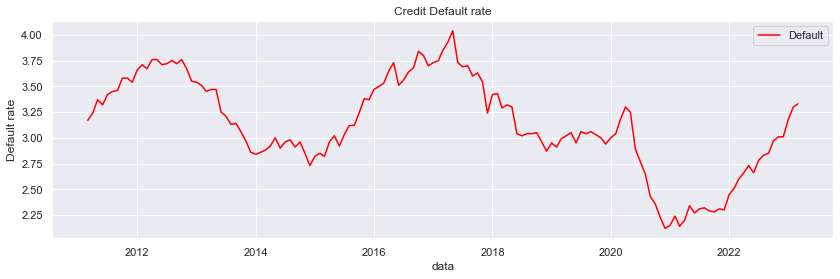

In [234]:
plt.plot(df_def['data'], df_def['valor'], color = 'red', label = 'Default')
plt.title('Credit Default rate')
plt.xlabel('data')
plt.ylabel('Default rate')
plt.legend()
plt.show()

In [235]:
df_def.describe()

,valor
count,145.000000
mean,3.131931
std,0.454797
min,2.120000
25%,2.880000
50%,3.060000
75%,3.510000
max,4.040000


In [236]:
df_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    145 non-null    datetime64[ns]
 1   valor   145 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.4 KB


In [237]:
df_def = df_def.rename(columns={'valor': 'Default'})

In [238]:
df_def.head()

,data,Default
0,2011-03-01,3.17
1,2011-04-01,3.24
2,2011-05-01,3.37
3,2011-06-01,3.32
4,2011-07-01,3.42


In [239]:
# filter the data from the dataset above
start_date = datetime.datetime(2013, 1, 1)
end_date = datetime.datetime(2023, 3, 1)
df_def = df_def[(df_def['data'] >= start_date) & (df_def['data'] <= end_date)]

In [240]:
df_def.head()

,data,Default
22,2013-01-01,3.54
23,2013-02-01,3.51
24,2013-03-01,3.45
25,2013-04-01,3.47
26,2013-05-01,3.47


In [241]:
# Finding missing values
df_def.isna().sum().sort_values(ascending=False)

data       0
Default    0
dtype: int64

In [242]:
df_def.info

<bound method DataFrame.info of           data  Default
22  2013-01-01     3.54
23  2013-02-01     3.51
24  2013-03-01     3.45
25  2013-04-01     3.47
26  2013-05-01     3.47
..         ...      ...
140 2022-11-01     3.01
141 2022-12-01     3.01
142 2023-01-01     3.18
143 2023-02-01     3.30
144 2023-03-01     3.33

[123 rows x 2 columns]>

#### download the cost of credit data

In [243]:
url_3 = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.25351/dados?formato=json'

df_cost = pd.read_json(url_3)

In [244]:
df_cost.head()

,data,valor
0,01/01/2013,19.94
1,01/02/2013,19.98
2,01/03/2013,19.73
3,01/04/2013,19.56
4,01/05/2013,19.29


In [245]:
df_cost['data'] = pd.to_datetime(df_cost['data'], format='%d/%m/%Y')

In [246]:
df_cost.head()

,data,valor
0,2013-01-01,19.94
1,2013-02-01,19.98
2,2013-03-01,19.73
3,2013-04-01,19.56
4,2013-05-01,19.29


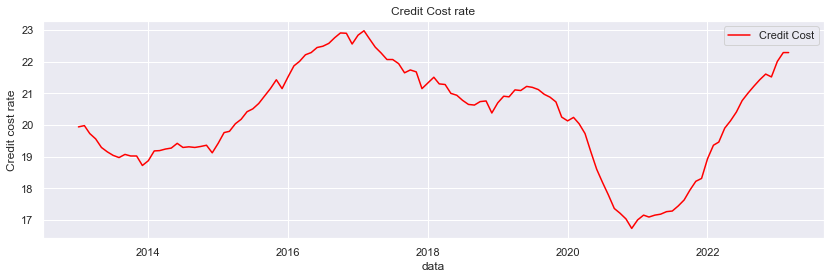

In [247]:
plt.plot(df_cost['data'], df_cost['valor'], color = 'red', label = 'Credit Cost')
plt.title('Credit Cost rate')
plt.xlabel('data')
plt.ylabel('Credit cost rate')
plt.legend()
plt.show()

In [248]:
df_cost.describe()

,valor
count,123.000000
mean,20.231951
std,1.612023
min,16.730000
25%,19.185000
50%,20.420000
75%,21.380000
max,22.980000


In [249]:
df_cost = df_cost.rename(columns={'valor': 'Credit_Cost'})

In [250]:
df_cost.head()

,data,Credit_Cost
0,2013-01-01,19.94
1,2013-02-01,19.98
2,2013-03-01,19.73
3,2013-04-01,19.56
4,2013-05-01,19.29


In [251]:
# filter the data from the dataset above
start_date = datetime.datetime(2013, 1, 1)
end_date = datetime.datetime(2023, 3, 1)
df_cost = df_cost[(df_cost['data'] >= start_date) & (df_cost['data'] <= end_date)]

In [252]:
df_cost.head()

,data,Credit_Cost
0,2013-01-01,19.94
1,2013-02-01,19.98
2,2013-03-01,19.73
3,2013-04-01,19.56
4,2013-05-01,19.29


In [253]:
# Finding missing values
df_cost.isna().sum().sort_values(ascending=False)

data           0
Credit_Cost    0
dtype: int64

In [254]:
df_cost.info

<bound method DataFrame.info of           data  Credit_Cost
0   2013-01-01        19.94
1   2013-02-01        19.98
2   2013-03-01        19.73
3   2013-04-01        19.56
4   2013-05-01        19.29
..         ...          ...
118 2022-11-01        21.61
119 2022-12-01        21.52
120 2023-01-01        22.01
121 2023-02-01        22.29
122 2023-03-01        22.29

[123 rows x 2 columns]>

#### Download the monetary base

In [255]:
url_4 = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.1783/dados?formato=json'

df_M = pd.read_json(url_4)

In [256]:
df_M.head()

,data,valor
0,01/01/1980,169000000
1,01/02/1980,174000000
2,01/03/1980,170000000
3,01/04/1980,177000000
4,01/05/1980,183000000


In [257]:
df_M['data'] = pd.to_datetime(df_M['data'], format='%d/%m/%Y')

In [258]:
df_M.head()

,data,valor
0,1980-01-01,169000000
1,1980-02-01,174000000
2,1980-03-01,170000000
3,1980-04-01,177000000
4,1980-05-01,183000000


In [259]:
df_M.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    519 non-null    datetime64[ns]
 1   valor   519 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 8.2 KB


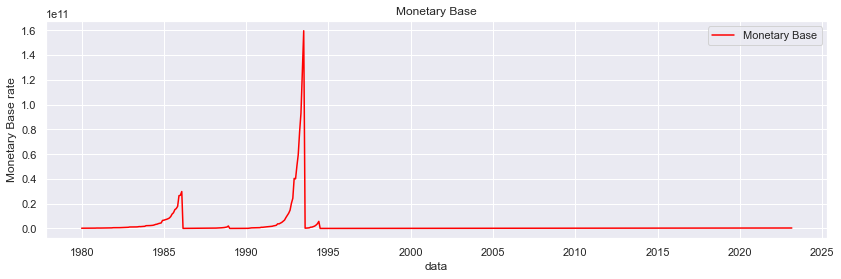

In [260]:
plt.plot(df_M['data'], df_M['valor'], color = 'red', label = 'Monetary Base')
plt.title('Monetary Base')
plt.xlabel('data')
plt.ylabel('Monetary Base rate')
plt.legend()
plt.show()

In [261]:
df_M = df_M.rename(columns={'valor': 'Monetary_Base'})

In [262]:
df_M.head()

,data,Monetary_Base
0,1980-01-01,169000000
1,1980-02-01,174000000
2,1980-03-01,170000000
3,1980-04-01,177000000
4,1980-05-01,183000000


In [263]:
# filter the data from the dataset above
start_date = datetime.datetime(2013, 1, 1)
end_date = datetime.datetime(2023, 3, 1)
df_M = df_M[(df_M['data'] >= start_date) & (df_M['data'] <= end_date)]

In [264]:
df_M.head()

,data,Monetary_Base
396,2013-01-01,172616875
397,2013-02-01,169063886
398,2013-03-01,166095210
399,2013-04-01,164464143
400,2013-05-01,165309792


In [265]:
# Finding missing values
df_M.isna().sum().sort_values(ascending=False)

data             0
Monetary_Base    0
dtype: int64

In [266]:
df_M.info

<bound method DataFrame.info of           data  Monetary_Base
396 2013-01-01      172616875
397 2013-02-01      169063886
398 2013-03-01      166095210
399 2013-04-01      164464143
400 2013-05-01      165309792
..         ...            ...
514 2022-11-01      326483189
515 2022-12-01      336697453
516 2023-01-01      342030075
517 2023-02-01      339383004
518 2023-03-01      334839285

[123 rows x 2 columns]>

### Merge the tables to only one

In [267]:
# merge the dataframes based on the 'data' column
df_merged = pd.merge(df, df_Spread, on='data')
df_merged = pd.merge(df_merged, df_def, on='data')
df_merged = pd.merge(df_merged, df_cost, on='data')
df_merged = pd.merge(df_merged, df_M, on='data')

# print the resulting dataframe
print(df_merged.head())


        data  IGPM  Credit_Spread  Default  Credit_Cost  Monetary_Base
0 2013-01-01  0.34          14.47     3.54        19.94      172616875
1 2013-02-01  0.29          14.59     3.51        19.98      169063886
2 2013-03-01  0.21          14.21     3.45        19.73      166095210
3 2013-04-01  0.15          14.11     3.47        19.56      164464143
4 2013-05-01  0.00          13.78     3.47        19.29      165309792


In [268]:
df_merged.head()

,data,IGPM,Credit_Spread,Default,Credit_Cost,Monetary_Base
0,2013-01-01,0.34,14.47,3.54,19.94,172616875
1,2013-02-01,0.29,14.59,3.51,19.98,169063886
2,2013-03-01,0.21,14.21,3.45,19.73,166095210
3,2013-04-01,0.15,14.11,3.47,19.56,164464143
4,2013-05-01,0.00,13.78,3.47,19.29,165309792


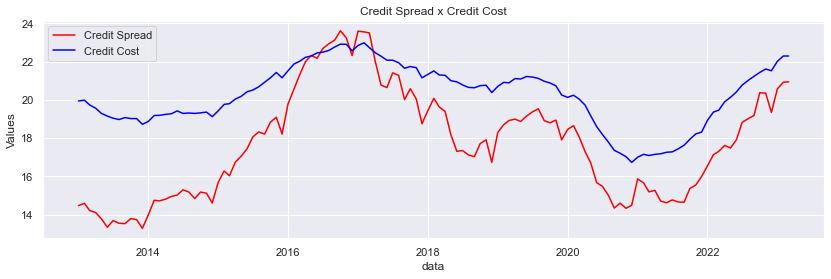

In [273]:
plt.plot(df_merged['data'], df_merged['Credit_Spread'], color='red', label='Credit Spread')
plt.plot(df_merged['data'], df_merged['Credit_Cost'], color='blue', label='Credit Cost')

plt.title('Credit Spread x Credit Cost')
plt.xlabel('data')
plt.ylabel('Values')

plt.legend()
plt.show()

### Let's start the analysis with Pearson Correlation

In [274]:
import scipy.stats as stats

In [275]:
# calculate the correlation matrix
corr_matrix = df_merged.corr()

# print the correlation matrix
print(corr_matrix)

                   IGPM  Credit_Spread   Default  Credit_Cost  Monetary_Base
IGPM           1.000000      -0.315756 -0.456966    -0.490646       0.362058
Credit_Spread -0.315756       1.000000  0.665894     0.890259      -0.078576
Default       -0.456966       0.665894  1.000000     0.846425      -0.652764
Credit_Cost   -0.490646       0.890259  0.846425     1.000000      -0.415422
Monetary_Base  0.362058      -0.078576 -0.652764    -0.415422       1.000000


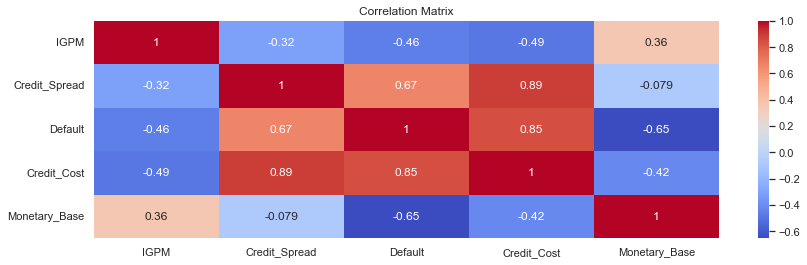

In [276]:
# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Add a title and show the plot
plt.title('Correlation Matrix')
plt.show()

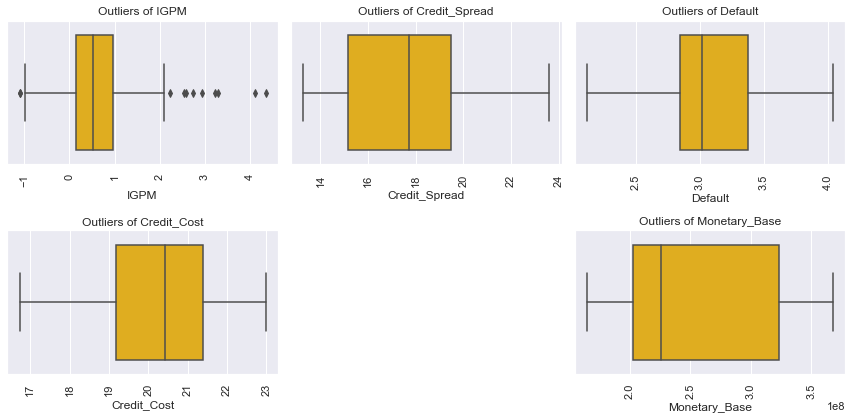

In [280]:
# Let's now search for outliers in the dataset 
# Create a list for all columns
int_cols = ['IGPM', 'Credit_Spread', 'Default', 'Credit_Cost', 'Monetary_Base']

# Define a functon to plot a graph
def data_outliers(x, fig):
    # subplot is used to plot multiple graph
    plt.subplot(2, 3, fig)
    # title of the graph
    plt.title('Outliers of ' + x)
    # plot the graph
    sns.boxplot(x=df_merged[x], palette=("Wistia"))
    plt.xticks(rotation=90)

plt.figure(figsize=(12, 6))
# call the function for each column except the last one
for e, i in enumerate(int_cols[:-1]):
    data_outliers(i, e+1)

# plot the last column separately
plt.subplot(2, 3, 6)
plt.title('Outliers of ' + int_cols[-1])
sns.boxplot(x=df_merged[int_cols[-1]], palette=("Wistia"))
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### Linear Regression to predict the credit cost

In [281]:
# Linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

In [282]:
df_merged.columns

Index(['data', 'IGPM', 'Credit_Spread', 'Default', 'Credit_Cost',
       'Monetary_Base'],
      dtype='object')

In [284]:
X = np.asarray(df_merged[['IGPM', 'Credit_Spread', 'Default', 'Monetary_Base']])
X[0:5]

array([[3.40000000e-01, 1.44700000e+01, 3.54000000e+00, 1.72616875e+08],
       [2.90000000e-01, 1.45900000e+01, 3.51000000e+00, 1.69063886e+08],
       [2.10000000e-01, 1.42100000e+01, 3.45000000e+00, 1.66095210e+08],
       [1.50000000e-01, 1.41100000e+01, 3.47000000e+00, 1.64464143e+08],
       [0.00000000e+00, 1.37800000e+01, 3.47000000e+00, 1.65309792e+08]])

In [285]:
y = np.asarray(df_merged['Credit_Cost'])
y[0:5]

array([19.94, 19.98, 19.73, 19.56, 19.29])

In [286]:
# train_test_split(x, y, random_state=1) # 20% test data
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [287]:
print("x_train:",x_train.shape)
print("x_test:",x_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)
print(len(x_train),len(y_train))

x_train: (98, 4)
x_test: (25, 4)
y_train: (98,)
y_test: (25,)
98 98


In [288]:
linReg=LinearRegression()
linReg.fit(x_train,y_train)

LinearRegression()

In [289]:
# linReg.fit(x_train, y_train)

model =linReg.fit(x_train,y_train)
print('linRegBeta =',linReg.coef_)
print()
print("linRegIntercept = ",linReg.intercept_)

linRegBeta = [-1.22135319e-01  4.08512244e-01  7.18807283e-01 -5.01181819e-09]

linRegIntercept =  12.123249160590802


In [290]:
# linreg.predict(x_test)

y_hat =linReg.predict(np.array(x_test))
mse = np.average((y_hat - np.array(y_test))**2) # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error 
print('MSE=',mse)
print()
print(mse,rmse)

MSE= 0.16904834305641778

0.16904834305641778 0.4111548893743303


In [291]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(f'MAE: {mean_absolute_error(y_test, y_hat)}')

MAE: 0.3262000468839201


In [292]:
linReg.score(x_train,y_train)

0.9289534645602007

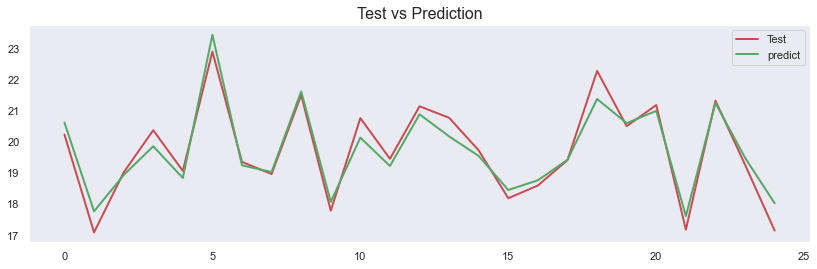

In [293]:
t= np.arange(len(x_test))
plt.plot(t,y_test,'r-',linewidth = 2,label = 'Test')
plt.plot(t,y_hat,'g-',linewidth = 2,label = 'predict')
plt.title("Test vs Prediction",fontsize = 16)
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

In [295]:
import statsmodels.api as sm

In [299]:
# Fit the ordinary least squares (OLS) model and print the summary
model = sm.OLS(y_train, x_train).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          1.189e+04
Date:                Wed, 03 May 2023   Prob (F-statistic):                   3.50e-126
Time:                        18:50:16   Log-Likelihood:                         -129.48
No. Observations:                  98   AIC:                                      267.0
Df Residuals:                      94   BIC:                                      277.3
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Although more research is needed to model has predicted Credit Cost with a decent degree of accuracy. It is important to observe that there is a possible multicolinearity problem, which requires further investigation.  